# Imports

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, naive_bayes, model_selection
import math

# Loading data

In [102]:
iris = datasets.load_iris()
x_train, x_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, test_size = 0.2)
classes = np.unique(iris.target)
classes

array([0, 1, 2])

# Naive bayes(Gaussian NB)

In [103]:
#This function calculates mean
def mean(x):
    sum = 0
    for i in range(len(x)):
        sum += x[i]
    return sum/len(x)

# This function calculates the standard deviation
def standard_deviation(x):
    mean_x = mean(x)
    squared_differences = np.zeros(len(x))
    for i in range(len(x)):
        squared_differences[i] = (x[i] - mean_x)**2
    squared_mean = squared_differences.mean()
    answer = math.sqrt(squared_mean)
    return answer

#this function will summarize data in the form {class:(mean, std_dev),(mean, std_dev); class:(mean:std_dev)}
def summarize(x, y, classes):
    summary = {}
    m = x.shape[0]
    for i in classes:
        summary[i] = []
        for j in range(x.shape[1]):
            numbers = []
            for k in range(m):
                if y[k] == i:
                    numbers.append(x[k,j])
            summary[i].append([mean(numbers), standard_deviation(numbers)])
    return summary

def probability(x, mean, std_deviation):
    prob = (1/math.sqrt(2*math.pi*(std_deviation)**2)) * math.exp(-((x-mean)**2)/(2*(std_deviation)**2))
    return prob

#This function calculates net probability of classes
def class_probability(summarized_data, x_test):
    probabilities = {}
    for i in summarized_data.keys():
        prob_helper = 1
        for j in range(len(summarized_data[i])):
            x = x_test[j]
            prob_helper *= probability(x, summarized_data[i][j][0], summarized_data[i][j][1])
        probabilities[i] = prob_helper
    return probabilities

def fit(x, y, classes):
    summarized_data = summarize(x, y, classes)
    return summarized_data

def predict(x, summarized_data):
    predictions = []
    for i in range(x.shape[0]):
        max_prob = -float('inf')
        predicted_class = 0
        probabilities = class_probability(summarized_data, x[i])
        for j in probabilities.keys():
            if max_prob < probabilities[j]:
                max_prob = probabilities[j]
                predicted_class = j
        predictions.append(predicted_class)
    return predictions
        
# dataset = [[1,20,0], [2,21,1], [3,22,0]]
# r = set(zip(*dataset))
# x = summarize(iris.data, iris.target, classes)
# class_probability(x, iris.data[0])
# len(x[0])
# x[0][0]

In [104]:
data = fit(x_train, y_train, classes)
predictions = predict(x_test, data)
metrics.confusion_matrix(y_test, predictions)

array([[11,  0,  0],
       [ 0,  6,  0],
       [ 0,  0, 13]], dtype=int64)

# Decision Boundary

In [105]:
# decision boundary for inbuilt
clf = naive_bayes.GaussianNB()
clf.fit(x_train[:,:2], y_train)

GaussianNB(priors=None)

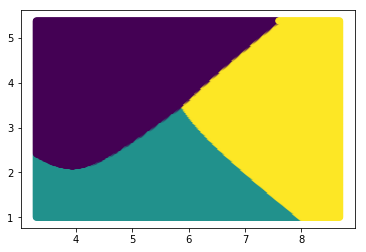

In [106]:
def make_grid(x, h = 0.02):
    x1_min = x[:,0].min() - 1
    x1_max = x[:,0].max() + 1
    x2_min = x[:,1].min() - 1
    x2_max = x[:,1].max() + 1
    a = np.arange(x1_min, x1_max, h)
    b = np.arange(x2_min, x2_max, h)
    xx, yy = np.meshgrid(a,b)
    return xx, yy

xx, yy = make_grid(x_train[:,:2])
predictions = clf.predict(np.c_[xx.ravel(), yy.ravel()])
plt.scatter(xx.ravel(), yy.ravel(), c = predictions)
plt.show()

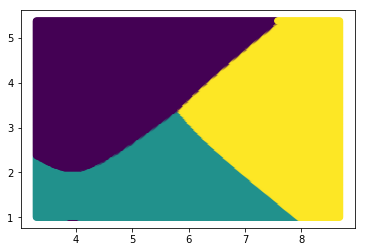

In [107]:
# Decision boundary using custom
def make_grid(x, h = 0.02):
    x1_min = x[:,0].min() - 1
    x1_max = x[:,0].max() + 1
    x2_min = x[:,1].min() - 1
    x2_max = x[:,1].max() + 1
    a = np.arange(x1_min, x1_max, h)
    b = np.arange(x2_min, x2_max, h)
    xx, yy = np.meshgrid(a,b)
    return xx, yy

xx, yy = make_grid(x_train[:,:2])
data = fit(x_train[:,:2], y_train, classes)
test_data = np.c_[xx.ravel(), yy.ravel()]
prediction = predict(test_data, data)
plt.scatter(xx.ravel(), yy.ravel(), c = prediction)
plt.show()